In [1]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

Constant image url

In [2]:
IMG_URL = 'https://news.mit.edu/sites/default/files/styles/news_article__image_gallery/public/images/201902/MIMIC-CXR-Chest-X-Ray-00_0.jpeg'

Download locally and load

In [3]:
image_path = 'image.jpg'
urllib.request.urlretrieve(IMG_URL, image_path)
img_base = plt.imread(image_path)

Lets view some parameters our image

In [4]:
def param_view(img):
    print('Image shape:', img.shape)
    print('Image type:', img.dtype)
    print('Max val:', np.max(img))
    print('Min val:', np.min(img))
param_view(img_base)

Image shape: (352, 498, 3)
Image type: uint8
Max val: 251
Min val: 5


Our image is not greyscale - will use simple transformation to greyscale

In [5]:
img_grey = img_base[:,:,0]/3 + img_base[:,:,1]/3 + img_base[:,:,2]/3
img_grey = img_grey.astype('uint8')
param_view(img_grey)

Image shape: (352, 498)
Image type: uint8
Max val: 251
Min val: 5


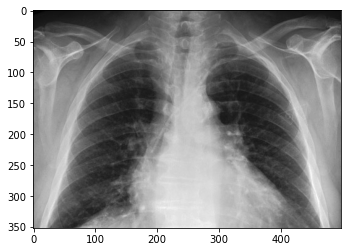

In [6]:
plt.figure()
plt.imshow(img_grey, cmap='gray')
plt.show()

In [7]:
def get_histo(img):
    hist = np.zeros(256)  # Assuming uint8
    rows, cols = img.shape
    for row in img_grey:
        for col in row:
            hist[img[row, col]] += 1
    return hist

In [8]:
img_grey_histo = get_histo(img_grey)
img_grey_pdf = img_grey_histo / np.sum(img_grey_histo)
img_grey_cdf = np.cumsum(img_grey_pdf)
nbins = np.arange(0, 256)

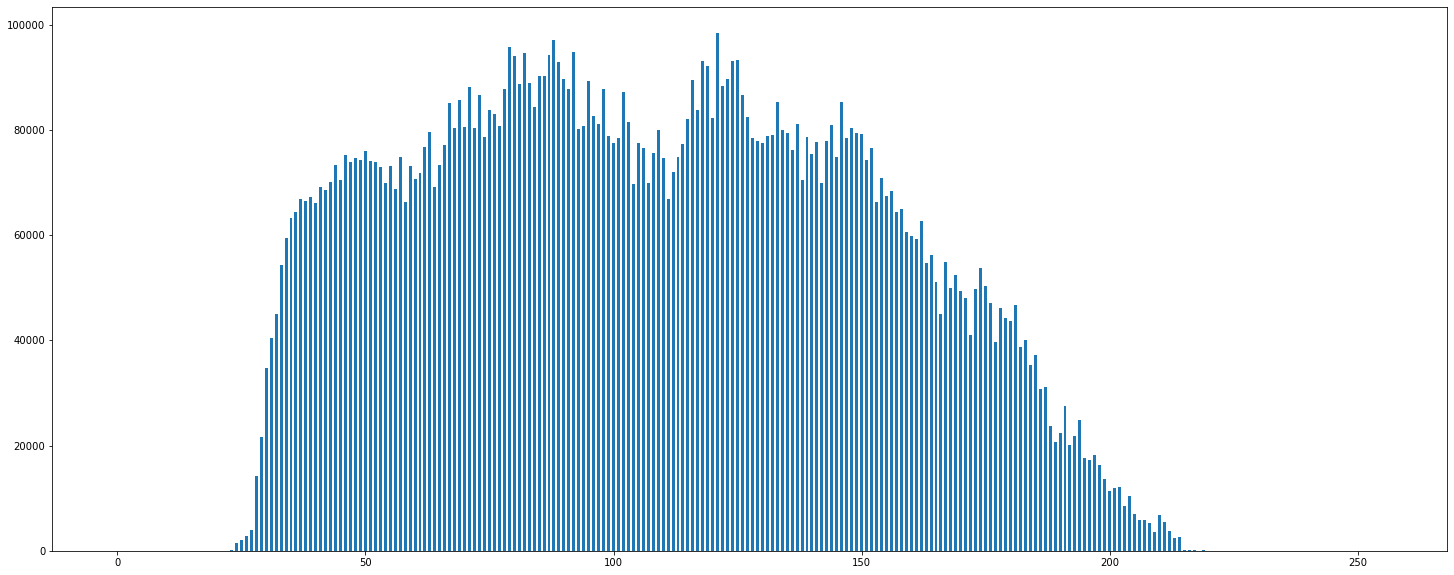

In [9]:
plt.figure(figsize=(25, 10))
plt.bar(nbins, img_grey_histo, width=0.6)
plt.show()

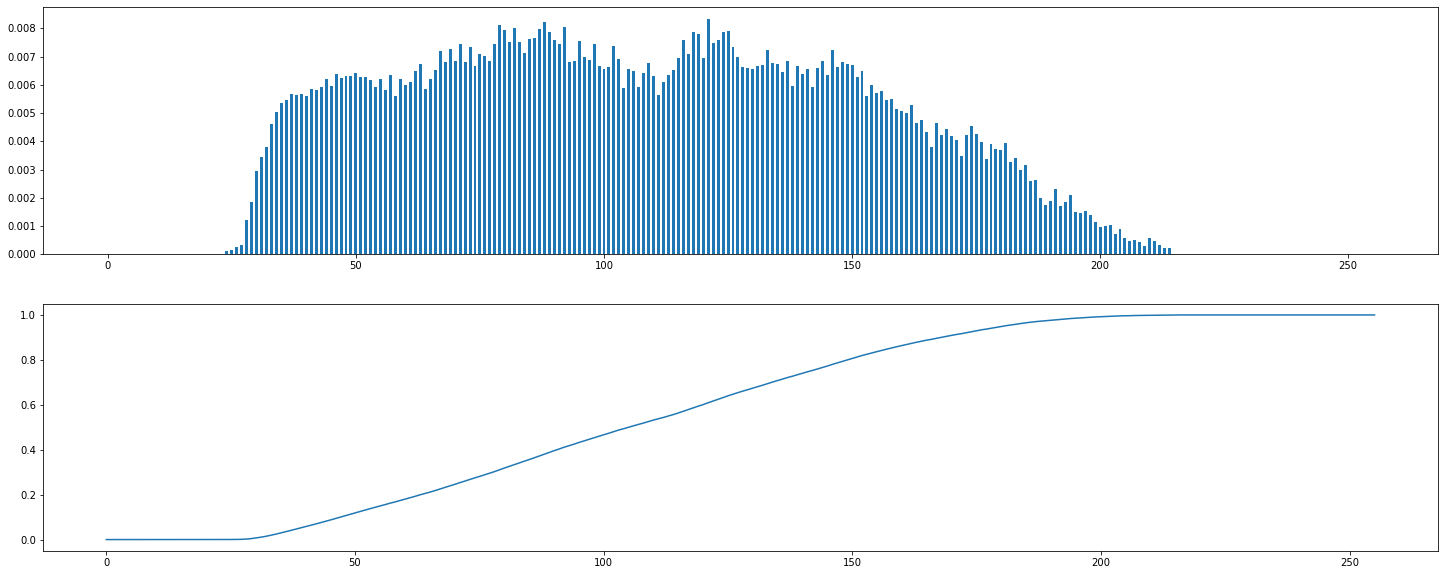

In [10]:
plt.figure(figsize=(25, 10))
plt.subplot(211)
plt.bar(nbins, img_grey_pdf, width=0.6)
plt.subplot(212)
plt.plot(nbins, img_grey_cdf)
plt.show()

Histogram Equalization

In [11]:
img_grey_hist_eq = np.interp(img_grey.flatten(), nbins, img_grey_cdf)
img_grey_hist_eq = img_grey_hist_eq.reshape(img_grey.shape)
img_grey_hist_eq = ((img_grey_hist_eq / np.max(img_grey_hist_eq))*255).astype('uint8')

In [12]:
img2_grey_histo = get_histo(img_grey_hist_eq)
img2_grey_pdf = img2_grey_histo / np.sum(img2_grey_histo)
img2_grey_cdf = np.cumsum(img2_grey_pdf)

Results

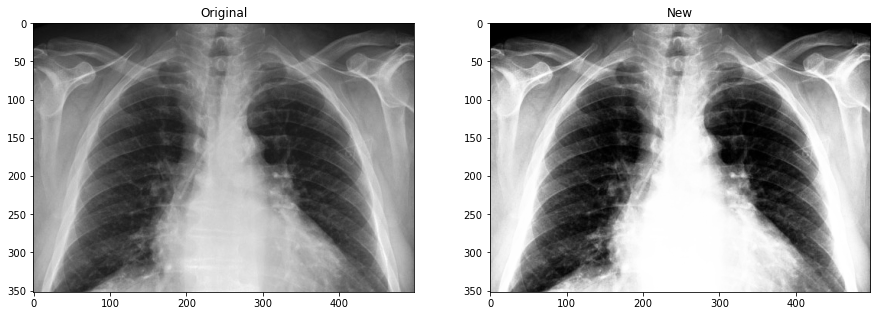

In [13]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.title('Original')
plt.imshow(img_grey, cmap='gray')
plt.subplot(122)
plt.title('New')
plt.imshow(img_grey_hist_eq, cmap='gray')
plt.show()

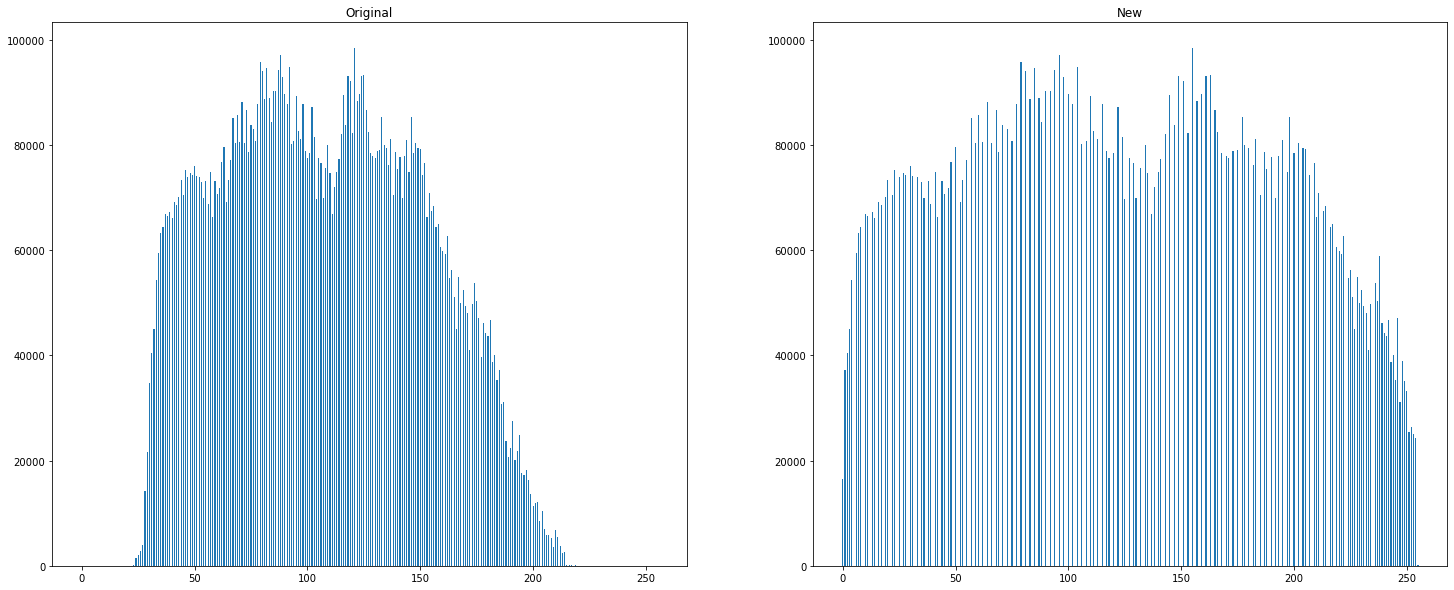

In [18]:
plt.figure(figsize=(25, 10))
plt.subplot(121)
plt.title('Original')
plt.bar(nbins, img_grey_histo, width=0.5)
plt.subplot(122)
plt.title('New')
plt.bar(nbins, img2_grey_histo, width=0.5)
plt.show()

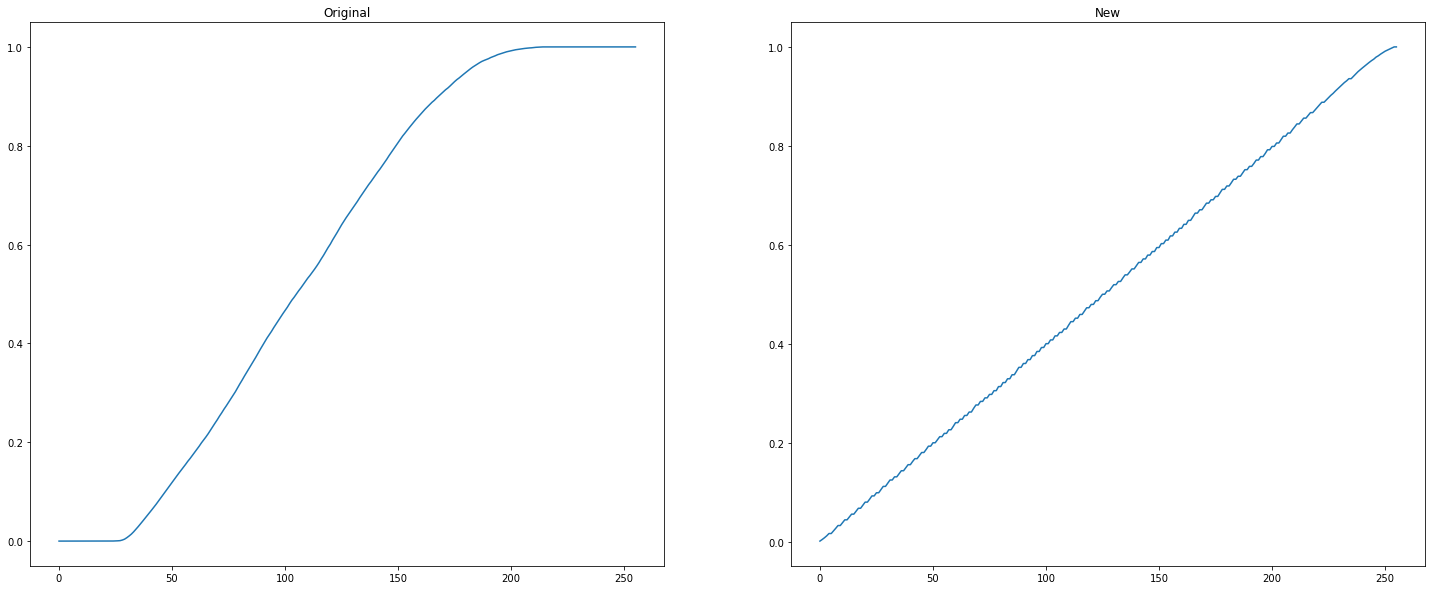

In [21]:
plt.figure(figsize=(25, 10))
plt.subplot(121)
plt.title('Original')
plt.plot(nbins, img_grey_cdf)
plt.subplot(122)
plt.title('New')
plt.plot(nbins, img2_grey_cdf)
plt.show()